In [1]:
import astropy

import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

import numpy as np


In [2]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits',cache=True)

In [3]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /u/m/amw58/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [4]:
image_data = hdu_list[0].data

In [5]:
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(893, 891)


In [6]:
hdu_list.close()

In [7]:
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(893, 891)


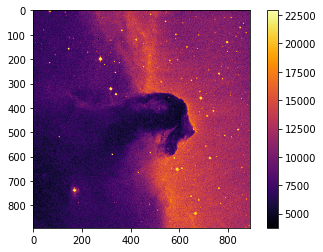

In [8]:
plt.imshow(image_data, cmap='inferno')
plt.colorbar()

In [23]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

('Min:', 3759)
('Max:', 22918)
('Mean:', 9831.481676287574)
('Stdev:', 3032.3927542049046)


In [24]:
print(type(image_data.flatten))

<type 'builtin_function_or_method'>


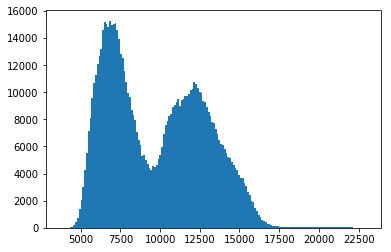

In [25]:
histogram = plt.hist(image_data.flatten(), bins='auto')

In [26]:
from matplotlib.colors import LogNorm

[Text(1,0,'5,000'), Text(1,0,'10,000'), Text(1,0,'fuck off')]

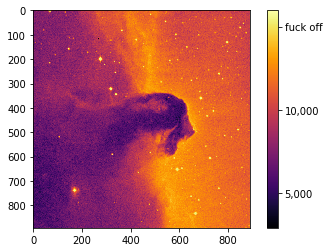

In [27]:
plt.imshow(image_data, cmap='inferno', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','fuck off'])

In [29]:
base_url = 'http://data.astropy.org/tutorials/FITS-images/M13_blue_{0:04d}.fits'
image_list = [download_file(base_url.format(n), cache=True)
                for n in range(1, 5+1)]
image_concat = [fits.getdata(image) for image in image_list]

HTTPError: HTTP Error 502: Bad Gateway